Q2. Evaluation Metrics for Bias Detection. ​[50 Marks]
Dataset : Fashion MNIST
Motive of this question is to use metrics to detect and evaluate the bias in the machine learning model.
● AIM: ​Perform a 2-class classification between ​Pullover​ and ​Coat
● Training data split:​ Take all the training samples corresponding to Pullover, and only 500
samples for Coat.
● Testing data split:​ Take all the testing samples corresponding to Pullover and Coat.
 
● Cross-validation:​ Repeat each of the experiments 2 more times by taking different 500 samples of Coat.
● Algorithms:​ Perform classification using:
○ A linear SVM. (You may use sklearn library)
○ A 5 layer neural network with architecture: [ 128 -- 128 -- 128 -- 64 -- 1 ]
(These numbers denote the number of nodes in each layer)
● Perform a 2 class classification and report the performance as follows:
○ Report :
■ Testing performance (mean ± std) [5 Marks]
■ Comparison of Testing Accuracy and show Confusion matrix for the
classification performed: SVM vs Neural Network [5 Marks]
○ ROC curve (just 1 ROC for each algorithm with error bars, as shown in below graph) and
report EER (Equal Error Rate). [MUST be done from scratch] [15 Marks]
○ Draw the Precision-Recall curve. [MUST be done from scratch] [5 Marks]
○ Of the two curves stated above, which is more reliable for biased/imbalanced data? Why?
Draw inferences from the observed results on why one approach performs worse/better than the other. [20 Marks]

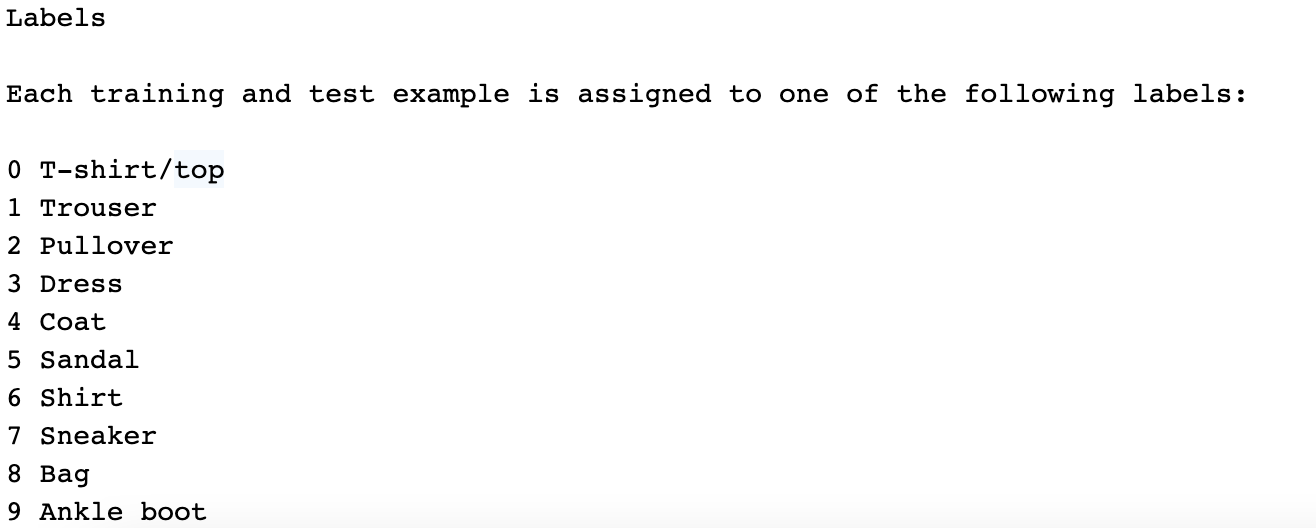

In [38]:
# Pullover = 2, coat = 4

In [39]:
# Ref : https://www.tensorflow.org/tutorials/keras/classification
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [40]:
# For pullover
idx = (train_labels == 2).reshape(train_images.shape[0])
Xtrain_pullover = train_images[idx]
Ytrain_pullover = train_labels[idx]
print(Xtrain_pullover.shape)
print(Ytrain_pullover.shape)
idx_test = (test_labels == 2).reshape(test_images.shape[0])
Xtest_pullover = test_images[idx_test]
Ytest_pullover = test_labels[idx_test]
print(Xtest_pullover.shape)
print(Ytest_pullover.shape)

(6000, 28, 28)
(6000,)
(1000, 28, 28)
(1000,)


In [41]:
# For coat
idx = (train_labels == 4).reshape(train_images.shape[0])
Xtrain_coat = train_images[idx]
Ytrain_coat = train_labels[idx]
print(Xtrain_coat.shape)
print(Ytrain_coat.shape)
idx_test = (test_labels == 4).reshape(test_images.shape[0])
Xtest_coat = test_images[idx_test]
Ytest_coat = test_labels[idx_test]
print(Xtest_coat.shape)
print(Ytest_coat.shape)

(6000, 28, 28)
(6000,)
(1000, 28, 28)
(1000,)


Training data split:​ Take all the training samples corresponding to Pullover, and only 500 samples for Coat. ● Testing data split:​ Take all the testing samples corresponding to Pullover and Coat.

In [42]:
# X_train, Y_train, X_test, Y_test
# np.array(Xtrain_coat[0:500]).shape
X_train = np.concatenate((Xtrain_pullover, Xtrain_coat[0:500]))
# To take different samples just change teh indices from 500:1000 and then 1500:2000
print(X_train.shape) # Expecting 6500
Y_train = np.concatenate((Ytrain_pullover, Ytrain_coat[0:500]))
# To take different samples just change teh indices from 500:1000 and then 1500:2000
print(Y_train.shape) # Expecting 6500
X_test = np.concatenate((Xtest_pullover, Xtest_coat))
print(X_test.shape)
Y_test = np.concatenate((Ytest_pullover, Ytest_coat))
print(Y_test.shape)


(6500, 28, 28)
(6500,)
(2000, 28, 28)
(2000,)


Algorithms:​ Perform classification using: ○ A linear SVM. (You may use sklearn library) ○ A 5 layer neural network with architecture: [ 128 -- 128 -- 128 -- 64 -- 1 ] (These numbers denote the number of nodes in each layer) 

# Linear SVM

In [43]:
# xtrain = X_train.reshape(-1, 784)
# xtrain.shape
# from sklearn import svm
# # Create a classifier: a support vector classifier
# classifier = svm.SVC(gamma=0.001)
# #fit to the trainin data
# classifier.fit(X_train,Y_train)


X_train = X_train.reshape(-1, 784)
Y_train = Y_train
X_test = X_test.reshape(-1, 784)
Y_test = Y_test
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(6500, 784)
(6500,)
(2000, 784)
(2000,)


In [44]:
# RBF KERNEL

# # C=1 Default kernel = default (rbf)
# from sklearn import svm
# # Create a classifier: a support vector classifier
# classifier = svm.SVC(gamma=0.001)
# #fit to the trainin data
# classifier.fit(X_train,Y_train)
# Y_pred = classifier.predict(X_test)
# accu = classifier.score(X_test, Y_test)
# print("Testing accuracy:",accu)
# from sklearn.metrics import classification_report, confusion_matrix
# print("Classification Report: \n",classification_report(Y_test, Y_pred))
# print("Confusion Matrix: \n", confusion_matrix(Y_test, Y_pred))

# import seaborn as sns

# matrix = confusion_matrix(Y_test, Y_pred)
# sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False,
#             xticklabels=classes,
#             yticklabels=classes)
# plt.xlabel('true label')
# plt.ylabel('predicted label');

Testing accuracy: 0.713
----------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           2       0.64      0.97      0.77      1000
           4       0.94      0.46      0.61      1000

    accuracy                           0.71      2000
   macro avg       0.79      0.71      0.69      2000
weighted avg       0.79      0.71      0.69      2000

Confusion Matrix: 
 [[971  29]
 [545 455]]
----------------------------------------
----------------------------------------


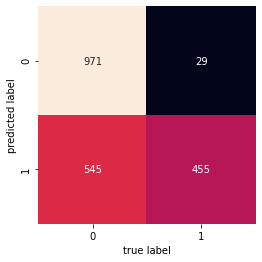

In [45]:
# C=1 kernel = linear
from sklearn import svm
# Create a classifier: a support vector classifier
classifier = svm.SVC(kernel='linear', probability=True)
#fit to the trainin data
classifier.fit(X_train/255,Y_train)
# p = np.array(classifier.decision_function(X_train))
# prob = np.exp(p)/np.sum(np.exp(p)) # softmax 
# Y_score = prob
Y_pred = classifier.predict(X_test/255)
accu = classifier.score(X_test/255, Y_test)
print("Testing accuracy:",accu)
print("----------------------------------------")
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print("Classification Report: \n",classification_report(Y_test, Y_pred))
print("Confusion Matrix: \n", confusion_matrix(Y_test, Y_pred))
print("----------------------------------------")
import seaborn as sns

matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');
print("----------------------------------------")


In [46]:
print("Mean / STD:")
a_mean=(matrix[0,0]+matrix[1,1])/(matrix[0,0]+matrix[0,1]+matrix[1,0]+matrix[1,1])
result=a_mean*100
print(result)

Mean / STD:
71.3


[5 4 2]


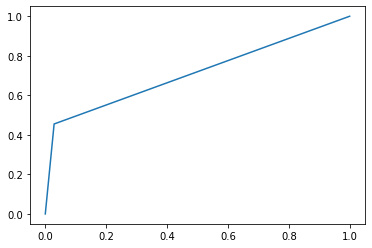

In [47]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred, pos_label=2)
plt.plot(tpr, fpr)
print(thresholds)

In [48]:
# tn = 817
# fp = 233
# fn = 183
# tp = 767
# print(Y_test)
# print(Y_pred)
Y_test = np.where(Y_test==2, 0, Y_test)
Y_test = np.where(Y_test==4, 1, Y_test) 
Y_pred = np.where(Y_pred==2, 0, Y_pred)
Y_pred = np.where(Y_pred==4, 1, Y_pred)
print(Y_test) # IMP
print(Y_pred)


[0 0 0 ... 1 1 1]
[0 0 0 ... 0 1 0]


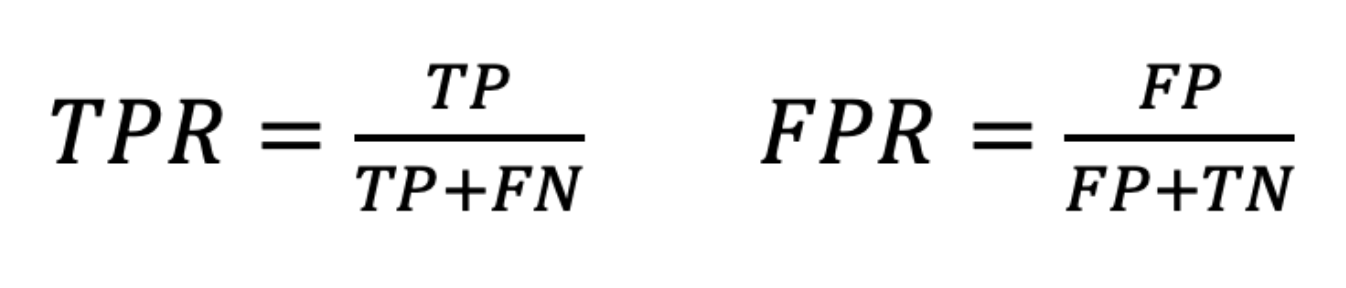

In [49]:
# fpr = fp/(fp+tn)
# tpr = tp/(tp+fn)
# plt.plot(fpr,tpr,linestyle='--')

In [50]:
# Didnt work!!!
# tns=[]
# fps=[]
# fns=[]
# tps=[]

# tn=0
# fp=0
# fn=0
# tp=0
# for i in range(len(Y_test)):
#   if(Y_test[i]):
#     if(Y_test[i]==Y_pred[i]):
#       tp=tp+1
#       tps.append(tp)
#     else:
#       fn=fn+1
#       fns.append(fn)
#   else:
#     if(Y_test[i]==Y_pred[i]):
#       tn=tn+1
#       tns.append(tn)
#     else:
#       fp=fp+1
#       fps.append(fp)

# # print(tn)
# # print(fp)
# # print(fn)
# # print(tp)

to code beyond this,I referred. specially the threshold part. hence referred GitHub Repo: The notebook link: https://github.com/tejas2454/Bias-Detection-and-Mitigation-Trusted-AI/blob/master/MNIST%20Bias%20detecton%20ROC%20scratch%20code.ipynb

In [51]:
prb = classifier.predict_proba(X_test/255)
print(prb.shape)

(2000, 2)


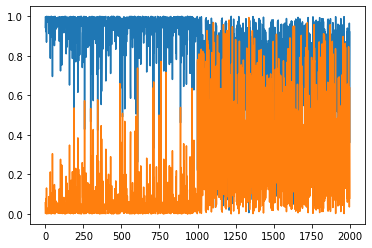

In [52]:
prb
plt.plot(prb)

In [53]:
prb=prb[:,0]

In [54]:
roc=np.concatenate((Y_test.astype(int).reshape((2000,1)),Y_pred.reshape((2000,1)),prb.reshape((2000,1))),axis=1)

In [55]:
roc

array([[0.        , 0.        , 0.94356987],
       [0.        , 0.        , 0.99742742],
       [0.        , 0.        , 0.99560372],
       ...,
       [1.        , 0.        , 0.96473941],
       [1.        , 1.        , 0.3597238 ],
       [1.        , 0.        , 0.92042549]])

In [56]:
pullover_2 = []
coat_4 = []
for i in range(len(roc)):
  if (roc[i,0]==1):
    coat_4.append(roc[i,:])
  else:
    pullover_2.append(roc[i,:])

print("coat_4")
print(coat_4)
print('\n')
print("pullover_2")
print(pullover_2)

thresh=np.unique(np.concatenate((np.asarray(coat_4)[:,-1],np.asarray(pullover_2)[:,-1]),axis=0))
thresh_matrix=np.sort(thresh[::-1].T).reshape((len(thresh),1))[::-1]
sequence_arr=np.concatenate((np.asarray(coat_4)[:,:],np.asarray(pullover_2)[:,:]),axis=0)



coat_4
[array([1.        , 1.        , 0.21980924]), array([1.        , 0.        , 0.77066734]), array([1.        , 1.        , 0.43046017]), array([1.        , 0.        , 0.98476694]), array([1.        , 0.        , 0.95300185]), array([1.        , 1.        , 0.53815336]), array([1.        , 0.        , 0.96332442]), array([1.        , 0.        , 0.90907302]), array([1.        , 0.        , 0.76480036]), array([1.        , 0.        , 0.69739318]), array([1.        , 1.        , 0.19087377]), array([1.        , 1.        , 0.56331731]), array([1.      , 0.      , 0.917126]), array([1.        , 0.        , 0.85356469]), array([1.        , 0.        , 0.99456328]), array([1.        , 0.        , 0.88328229]), array([1.        , 1.        , 0.29400971]), array([1.       , 0.       , 0.8901543]), array([1.        , 1.        , 0.20876079]), array([1.        , 0.        , 0.72333619]), array([1.        , 0.        , 0.86079546]), array([1.        , 1.        , 0.52073251]), array([1.  

In [57]:
def tpr_fpr(arr,thresh):
  x=[]
  for k in range(len(thresh)):
    t=thresh[k]
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(arr)):  
      if (arr[i,0]==0 and (arr[i,2]==t or arr[i,2]>t )):
        tp+=1
      elif (arr[i,0]==1 and (arr[i,2]==t or arr[i,2]>t)):
        fp+=1
      elif (arr[i,0]==1 and arr[i,2]<t):
        tn+=1
      else :
        fn+=1
    x.append(tp/(tp+fn))
    x.append(fp/(tn+fp))
  return(x)

def precision_recall(arr,thresh):
  x=[]
  for k in range(len(thresh)):
    t=thresh[k]
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(arr)):  
      if (arr[i,0]==0 and (arr[i,2]==t or arr[i,2]>t )):
        tp+=1
      elif (arr[i,0]==1 and (arr[i,2]==t or arr[i,2]>t)):
        fp+=1
      elif (arr[i,0]==1 and arr[i,2]<t):
        tn+=1
      else :
        fn+=1
    x.append(tp/(tp+fp))
    x.append(tp/(tp+fn))
  return(x)

In [58]:
final_plot_roc=np.asarray(tpr_fpr(sequence_arr,thresh_matrix))
roc_ma=final_plot_roc.reshape((int(len(final_plot_roc)/2),2))

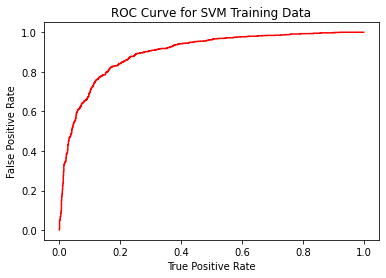

In [59]:

import matplotlib.pyplot as plt
plt.title('ROC Curve for SVM Training Data')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.plot(roc_ma[:,1],roc_ma[:,0],'r')   
plt.show()

In [60]:
final_plot_pr=np.asarray(precision_recall(sequence_arr,thresh_matrix))
pr=final_plot_pr.reshape((int(len(final_plot_pr)/2),2))


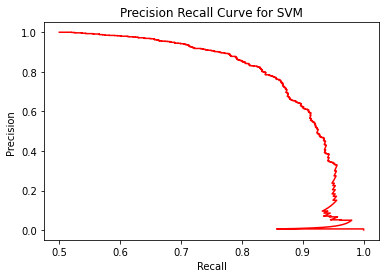

In [63]:

import matplotlib.pyplot as plt
plt.title('Precision Recall Curve for SVM')
plt.ylabel('Precision ')
plt.xlabel('Recall')
plt.plot(pr[:,0],pr[:,1],'r')  
plt.show()

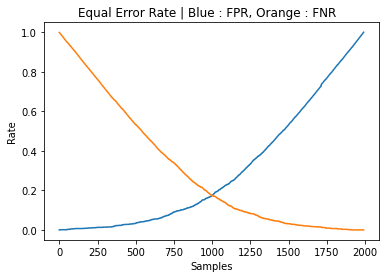

In [62]:
def fpr_fnr(arr,thresh):
  x=[]
  for k in range(len(thresh)):
    t=thresh[k]
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(arr)):  
      if (arr[i,0]==0 and (arr[i,2]==t or arr[i,2]>t )):
        tp+=1
      elif (arr[i,0]==1 and (arr[i,2]>=t)):
        fp+=1
      elif (arr[i,0]==1 and arr[i,2]<t):
        tn+=1
      else :
        fn+=1
    x.append(fp/(tn+fp))
    x.append(fn/(tp+fn))
  return(x)
EER=np.asarray(fpr_fnr(sequence_arr,thresh_matrix))
plt.title("Equal Error Rate | Blue : FPR, Orange : FNR  ")
plt.xlabel('Samples')
plt.ylabel('Rate')
plt.plot(EER.reshape((int(len(EER)/2),2))[:,0])
plt.plot(EER.reshape((int(len(EER)/2),2))[:,1])
plt.show()

# Neural Network